In [1]:
import numpy as np
import matplotlib.pyplot as plt
from classifiers import *
from pipeline import *

from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [2]:
# 1 - Load the model and its pretrained weights
classifier = Meso4()
# 4 - Prediction for a video dataset

#classifier.load('weights/Meso4_F2F.h5')
classifier.load('weights/Meso4_DF.h5')

#classifier = MesoInception4()
#classifier.load('weights/MesoInception_DF.h5')
#classifier.load('weights/MesoInception_F2F.h5')


# 2 - Minimial image generator
# We did use it to read and compute the prediction by batchs on test videos
# but do as you please, the models were trained on 256x256 images in [0,1]^(n*n)

dataGenerator = ImageDataGenerator(rescale=1./255)
generator = dataGenerator.flow_from_directory(
        'test_images',
        target_size=(256, 256),
        batch_size=1,
        class_mode='binary',
        subset='training')

Found 81 images belonging to 2 classes.


C:\Users\sergi\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\optimizers\optimizer_v2\adam.py:110: UserWarning: The `lr` argument is deprecated, use `learning_rate` instead.
  super(Adam, self).__init__(name, **kwargs)


{'df': 0, 'real': 1}
1/1 [==============================] - 0s 23ms/step
Aciertos: 22
Errores: 59
Deepfakes detectados: 1
Reales detectados: 21
Falsos positivos: 0
Falsos negativos: 59


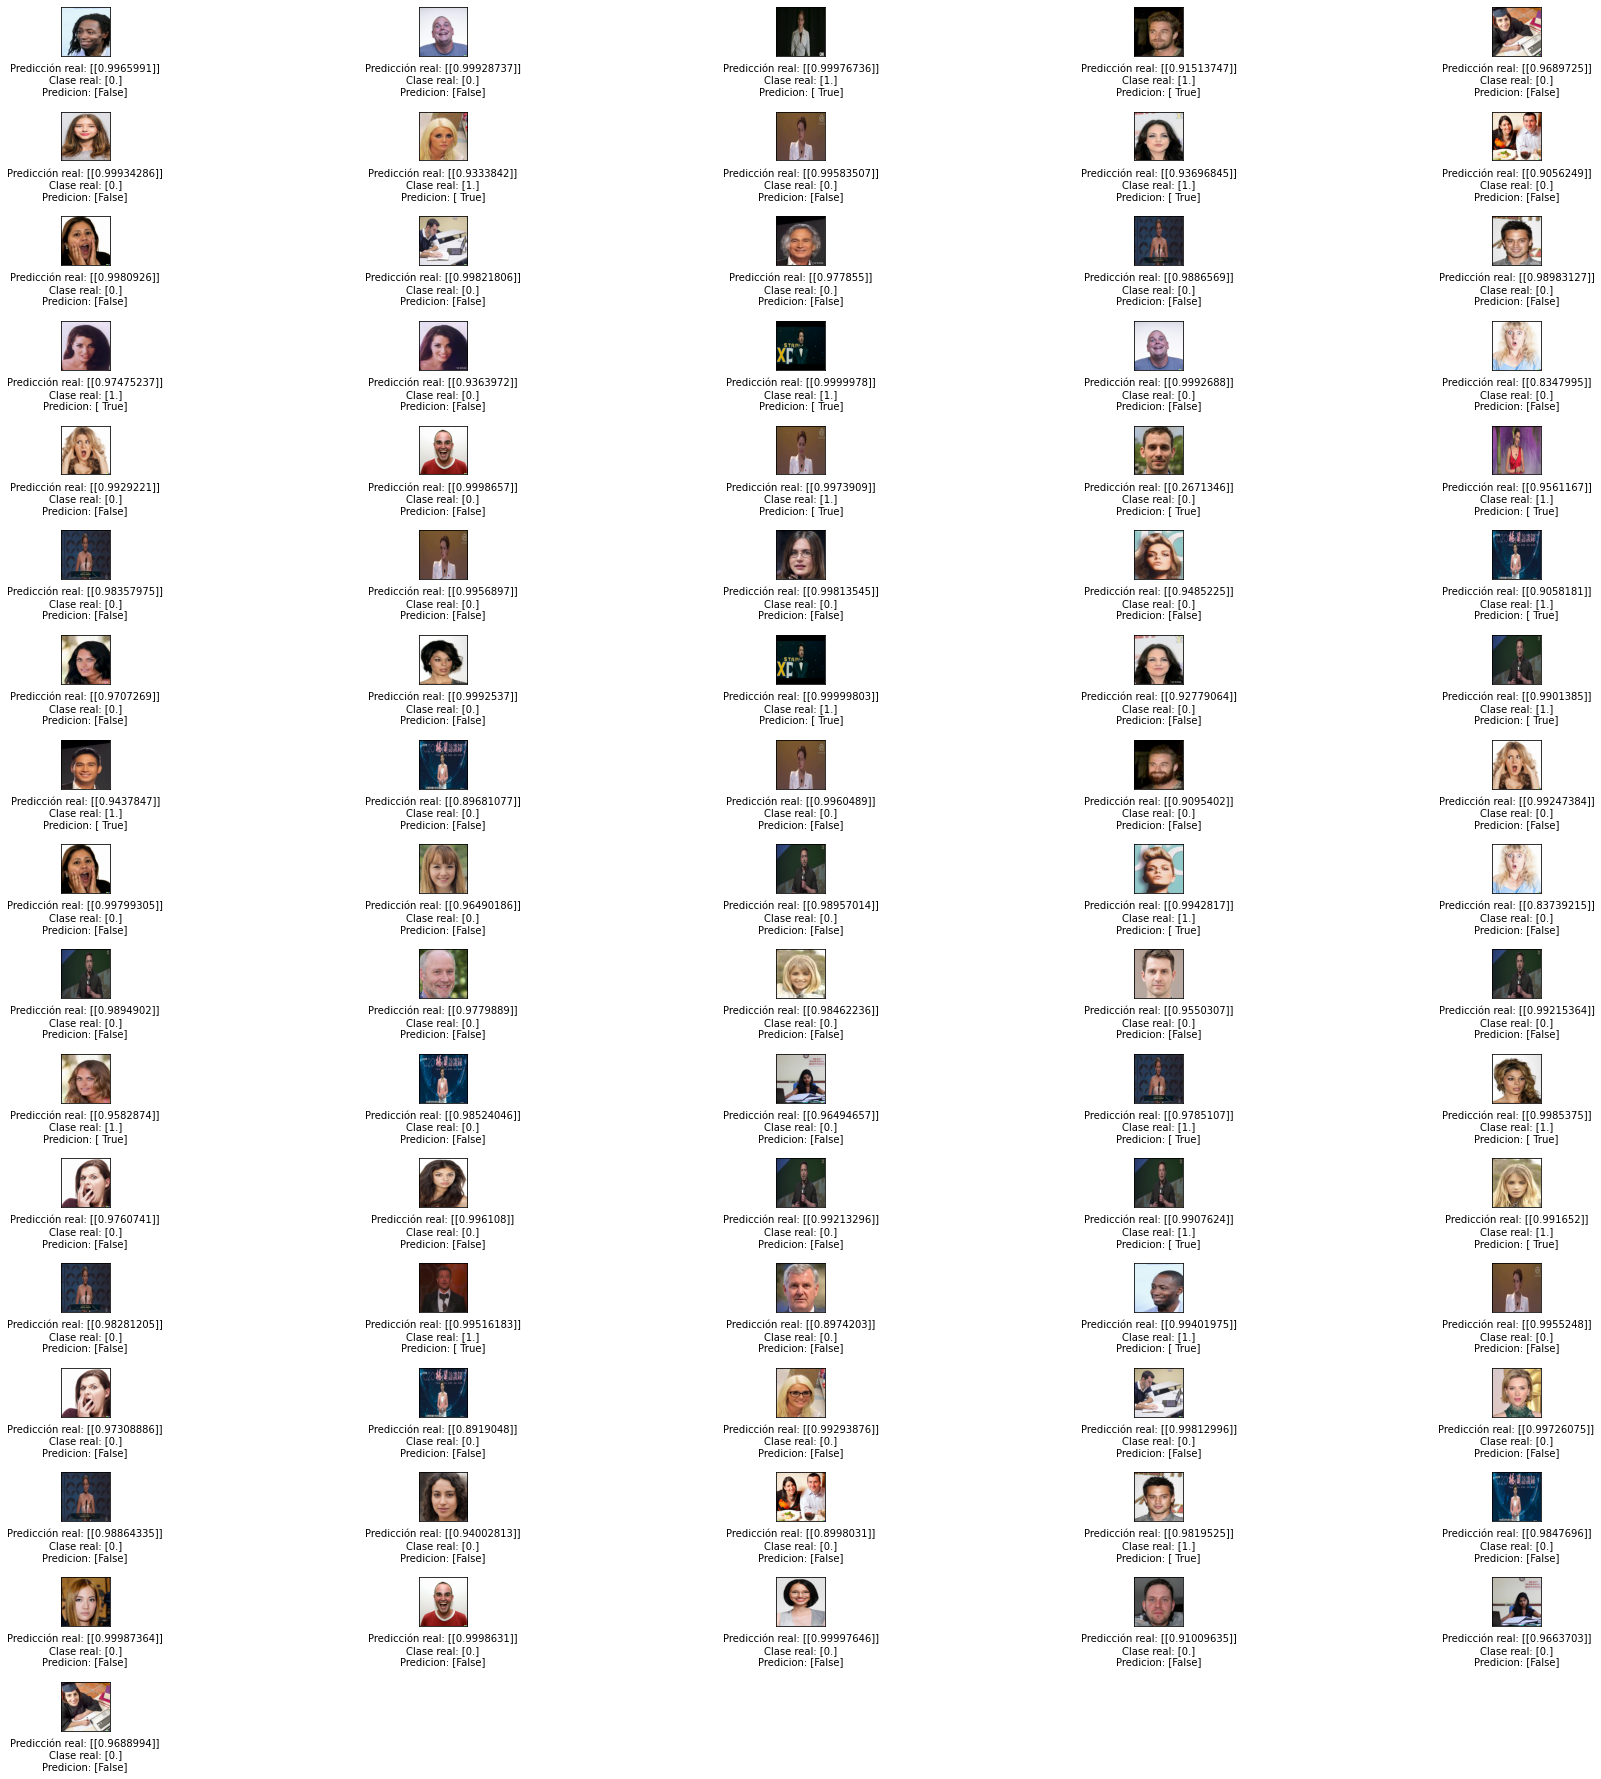

In [3]:
# 3 - Predict
fig = plt.figure(figsize=(25,25))
columnas = int(5);
total = int (1+ len(generator.labels) /columnas)
csv = ""
print(generator.class_indices)
aciertos = 0
errores = 0
falsopositivo = 0
falsonegativo = 0
deepfakedetectado = 0
realdetectado = 0
for i in range(len(generator.labels)):
    X, y = generator.next()
    fig.add_subplot(total,columnas,i+1)
    #plt.subplot(20,4,i+1)
    plt.imshow(np.squeeze(X))
    #(f"Model confidence: \n{preds[j]:.4f}")
    predit = float(classifier.predict(X))
    correccion = str(round(predit)==y)
    if (round(predit)==y):
        aciertos = aciertos +1
        if (y==1):
            realdetectado = realdetectado + 1
        else:
            deepfakedetectado = deepfakedetectado +1        
    else:
        errores = errores + 1
        if (y==1) :
            falsopositivo = falsopositivo + 1
        else:
            falsonegativo = falsonegativo + 1
    etiqueta = "Predicción real: " + str(classifier.predict(X)) + "\nClase real: " + str(y) + "\nPredicion: " + correccion 
    plt.xlabel(etiqueta)
    plt.grid(False);
    plt.tight_layout()
    ax = plt.gca()
    ax.axes.xaxis.set_ticks([])
    ax.axes.yaxis.set_ticks([])
print("Aciertos: " + str(aciertos) + "\nErrores: " + str(errores))
print("Deepfakes detectados: " + str(deepfakedetectado) + "\nReales detectados: " + str(realdetectado))
print("Falsos positivos: " + str(falsopositivo) + "\nFalsos negativos: " + str(falsonegativo))
        